In [4]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

## Does not work!

In [10]:
# Define the model

encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(
    encoding_dim, 
    activation='relu', 
    activity_regularizer=regularizers.l1(10e-4)
)(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [11]:
# Preprocess the data

(images_train, _), (images_test, _) = mnist.load_data()
images_train = images_train.astype('float32') / 255
x_train = images_train.reshape((len(images_train), np.prod(images_train.shape[1:])))

images_test = images_test.astype('float32') / 255
x_test = images_test.reshape((len(images_test), np.prod(images_test.shape[1:])))

print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [15]:
# Train the model
autoencoder.fit(
    x_train, x_train, 
    epochs=2000, 
    batch_size=256, 
    shuffle=True, 
    validation_data=(x_test, x_test)
)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2000
60000/60000 [==============================] - 2s - loss: 0.2642 - val_loss: 0.2640
Epoch 2/2000
60000/60000 [==============================] - 1s - loss: 0.2642 - val_loss: 0.2640
Epoch 3/2000
60000/60000 [==============================] - 1s - loss: 0.2642 - val_loss: 0.2640
Epoch 4/2000
60000/60000 [==============================] - 1s - loss: 0.2642 - val_loss: 0.2640
Epoch 5/2000
60000/60000 [==============================] - 1s - loss: 0.2642 - val_loss: 0.2640
Epoch 6/2000
60000/60000 [==============================] - 1s - loss: 0.2642 - val_loss: 0.2640
Epoch 7/2000
60000/60000 [==============================] - 1s - loss: 0.2642 - val_loss: 0.2640
Epoch 8/2000
60000/60000 [==============================] - 1s - loss: 0.2642 - val_loss: 0.2640
Epoch 9/2000
60000/60000 [==============================] - 1s - loss: 0.2642 - val_loss: 0.2640
Epoch 10/2000
60000/60000 [==============================] - 1s - loss: 0.264

60000/60000 [==============================] - 2s - loss: 0.2640 - val_loss: 0.2638
Epoch 85/2000
60000/60000 [==============================] - 2s - loss: 0.2640 - val_loss: 0.2638
Epoch 86/2000
60000/60000 [==============================] - 2s - loss: 0.2640 - val_loss: 0.2638
Epoch 87/2000
60000/60000 [==============================] - 2s - loss: 0.2640 - val_loss: 0.2638
Epoch 88/2000
60000/60000 [==============================] - 2s - loss: 0.2640 - val_loss: 0.2638
Epoch 89/2000
60000/60000 [==============================] - 2s - loss: 0.2640 - val_loss: 0.2638
Epoch 90/2000
60000/60000 [==============================] - 2s - loss: 0.2640 - val_loss: 0.2638
Epoch 91/2000
60000/60000 [==============================] - 2s - loss: 0.2640 - val_loss: 0.2638
Epoch 92/2000
60000/60000 [==============================] - 2s - loss: 0.2640 - val_loss: 0.2638
Epoch 93/2000
60000/60000 [==============================] - 2s - loss: 0.2640 - val_loss: 0.2638
Epoch 94/2000
60000/60000 [=======

60000/60000 [==============================] - 2s - loss: 0.2639 - val_loss: 0.2636
Epoch 168/2000
60000/60000 [==============================] - 1s - loss: 0.2639 - val_loss: 0.2636
Epoch 169/2000
60000/60000 [==============================] - 1s - loss: 0.2639 - val_loss: 0.2636
Epoch 170/2000
60000/60000 [==============================] - 1s - loss: 0.2639 - val_loss: 0.2636
Epoch 171/2000
60000/60000 [==============================] - 1s - loss: 0.2639 - val_loss: 0.2636
Epoch 172/2000
60000/60000 [==============================] - 2s - loss: 0.2639 - val_loss: 0.2636
Epoch 173/2000
60000/60000 [==============================] - 1s - loss: 0.2639 - val_loss: 0.2636
Epoch 174/2000
60000/60000 [==============================] - 1s - loss: 0.2639 - val_loss: 0.2636
Epoch 175/2000
60000/60000 [==============================] - 1s - loss: 0.2639 - val_loss: 0.2636
Epoch 176/2000
60000/60000 [==============================] - 2s - loss: 0.2639 - val_loss: 0.2636
Epoch 177/2000
60000/6000

60000/60000 [==============================] - 2s - loss: 0.2638 - val_loss: 0.2635
Epoch 250/2000
60000/60000 [==============================] - 2s - loss: 0.2638 - val_loss: 0.2635
Epoch 251/2000
60000/60000 [==============================] - 2s - loss: 0.2638 - val_loss: 0.2635
Epoch 252/2000
60000/60000 [==============================] - 2s - loss: 0.2638 - val_loss: 0.2635
Epoch 253/2000
60000/60000 [==============================] - 2s - loss: 0.2638 - val_loss: 0.2635
Epoch 254/2000
60000/60000 [==============================] - 2s - loss: 0.2638 - val_loss: 0.2635
Epoch 255/2000
60000/60000 [==============================] - 2s - loss: 0.2638 - val_loss: 0.2635
Epoch 256/2000
60000/60000 [==============================] - 2s - loss: 0.2638 - val_loss: 0.2635
Epoch 257/2000
60000/60000 [==============================] - 2s - loss: 0.2638 - val_loss: 0.2635
Epoch 258/2000
60000/60000 [==============================] - 2s - loss: 0.2638 - val_loss: 0.2635
Epoch 259/2000
60000/6000

60000/60000 [==============================] - 1s - loss: 0.2637 - val_loss: 0.2634
Epoch 332/2000
60000/60000 [==============================] - 2s - loss: 0.2637 - val_loss: 0.2634
Epoch 333/2000
60000/60000 [==============================] - 2s - loss: 0.2637 - val_loss: 0.2634
Epoch 334/2000
60000/60000 [==============================] - 2s - loss: 0.2637 - val_loss: 0.2634
Epoch 335/2000
60000/60000 [==============================] - 2s - loss: 0.2637 - val_loss: 0.2634
Epoch 336/2000
60000/60000 [==============================] - 2s - loss: 0.2637 - val_loss: 0.2634
Epoch 337/2000
60000/60000 [==============================] - 2s - loss: 0.2637 - val_loss: 0.2634
Epoch 338/2000
60000/60000 [==============================] - 2s - loss: 0.2637 - val_loss: 0.2634
Epoch 339/2000
60000/60000 [==============================] - 2s - loss: 0.2637 - val_loss: 0.2634
Epoch 340/2000
60000/60000 [==============================] - 2s - loss: 0.2637 - val_loss: 0.2634
Epoch 341/2000
60000/6000

60000/60000 [==============================] - 1s - loss: 0.2636 - val_loss: 0.2634
Epoch 414/2000
60000/60000 [==============================] - 1s - loss: 0.2636 - val_loss: 0.2634
Epoch 415/2000
60000/60000 [==============================] - 1s - loss: 0.2636 - val_loss: 0.2634
Epoch 416/2000
60000/60000 [==============================] - 1s - loss: 0.2636 - val_loss: 0.2634
Epoch 417/2000
60000/60000 [==============================] - 1s - loss: 0.2636 - val_loss: 0.2634
Epoch 418/2000
60000/60000 [==============================] - 1s - loss: 0.2636 - val_loss: 0.2634
Epoch 419/2000
60000/60000 [==============================] - 1s - loss: 0.2636 - val_loss: 0.2634
Epoch 420/2000
60000/60000 [==============================] - 1s - loss: 0.2636 - val_loss: 0.2634
Epoch 421/2000
60000/60000 [==============================] - 1s - loss: 0.2636 - val_loss: 0.2634
Epoch 422/2000
60000/60000 [==============================] - 1s - loss: 0.2636 - val_loss: 0.2634
Epoch 423/2000
60000/6000

60000/60000 [==============================] - 1s - loss: 0.2635 - val_loss: 0.2633
Epoch 496/2000
60000/60000 [==============================] - 1s - loss: 0.2635 - val_loss: 0.2633
Epoch 497/2000
60000/60000 [==============================] - 1s - loss: 0.2635 - val_loss: 0.2633
Epoch 498/2000
60000/60000 [==============================] - 1s - loss: 0.2635 - val_loss: 0.2633
Epoch 499/2000
60000/60000 [==============================] - 1s - loss: 0.2635 - val_loss: 0.2633
Epoch 500/2000
60000/60000 [==============================] - 1s - loss: 0.2635 - val_loss: 0.2633
Epoch 501/2000
60000/60000 [==============================] - 1s - loss: 0.2635 - val_loss: 0.2633
Epoch 502/2000
60000/60000 [==============================] - 1s - loss: 0.2635 - val_loss: 0.2633
Epoch 503/2000
60000/60000 [==============================] - 1s - loss: 0.2635 - val_loss: 0.2633
Epoch 504/2000
60000/60000 [==============================] - 1s - loss: 0.2635 - val_loss: 0.2633
Epoch 505/2000
60000/6000

60000/60000 [==============================] - 2s - loss: 0.2635 - val_loss: 0.2632
Epoch 578/2000
60000/60000 [==============================] - 2s - loss: 0.2635 - val_loss: 0.2632
Epoch 579/2000
60000/60000 [==============================] - 2s - loss: 0.2635 - val_loss: 0.2632
Epoch 580/2000
60000/60000 [==============================] - 2s - loss: 0.2635 - val_loss: 0.2632
Epoch 581/2000
60000/60000 [==============================] - 2s - loss: 0.2635 - val_loss: 0.2632
Epoch 582/2000
60000/60000 [==============================] - 2s - loss: 0.2635 - val_loss: 0.2632
Epoch 583/2000
60000/60000 [==============================] - 2s - loss: 0.2635 - val_loss: 0.2632
Epoch 584/2000
60000/60000 [==============================] - 2s - loss: 0.2635 - val_loss: 0.2632
Epoch 585/2000
60000/60000 [==============================] - 2s - loss: 0.2635 - val_loss: 0.2632
Epoch 586/2000
60000/60000 [==============================] - 2s - loss: 0.2635 - val_loss: 0.2632
Epoch 587/2000
60000/6000

60000/60000 [==============================] - 1s - loss: 0.2634 - val_loss: 0.2632
Epoch 660/2000
60000/60000 [==============================] - 1s - loss: 0.2634 - val_loss: 0.2632
Epoch 661/2000
60000/60000 [==============================] - 1s - loss: 0.2634 - val_loss: 0.2632
Epoch 662/2000
60000/60000 [==============================] - 1s - loss: 0.2634 - val_loss: 0.2632
Epoch 663/2000
60000/60000 [==============================] - 1s - loss: 0.2634 - val_loss: 0.2632
Epoch 664/2000
60000/60000 [==============================] - 1s - loss: 0.2634 - val_loss: 0.2632
Epoch 665/2000
60000/60000 [==============================] - 1s - loss: 0.2634 - val_loss: 0.2632
Epoch 666/2000
60000/60000 [==============================] - 1s - loss: 0.2634 - val_loss: 0.2632
Epoch 667/2000
60000/60000 [==============================] - 1s - loss: 0.2634 - val_loss: 0.2632
Epoch 668/2000
60000/60000 [==============================] - 1s - loss: 0.2634 - val_loss: 0.2632
Epoch 669/2000
60000/6000

60000/60000 [==============================] - 1s - loss: 0.2634 - val_loss: 0.2631
Epoch 742/2000
60000/60000 [==============================] - 2s - loss: 0.2634 - val_loss: 0.2631
Epoch 743/2000
60000/60000 [==============================] - 2s - loss: 0.2634 - val_loss: 0.2631
Epoch 744/2000
60000/60000 [==============================] - 1s - loss: 0.2634 - val_loss: 0.2631
Epoch 745/2000
60000/60000 [==============================] - 1s - loss: 0.2634 - val_loss: 0.2631
Epoch 746/2000
60000/60000 [==============================] - 1s - loss: 0.2634 - val_loss: 0.2631
Epoch 747/2000
60000/60000 [==============================] - 1s - loss: 0.2634 - val_loss: 0.2631
Epoch 748/2000
60000/60000 [==============================] - 1s - loss: 0.2634 - val_loss: 0.2631
Epoch 749/2000
60000/60000 [==============================] - 1s - loss: 0.2634 - val_loss: 0.2631
Epoch 750/2000
60000/60000 [==============================] - 1s - loss: 0.2634 - val_loss: 0.2631
Epoch 751/2000
60000/6000

60000/60000 [==============================] - 1s - loss: 0.2634 - val_loss: 0.2631
Epoch 824/2000
60000/60000 [==============================] - 1s - loss: 0.2634 - val_loss: 0.2631
Epoch 825/2000
60000/60000 [==============================] - 1s - loss: 0.2634 - val_loss: 0.2631
Epoch 826/2000
60000/60000 [==============================] - 1s - loss: 0.2634 - val_loss: 0.2631
Epoch 827/2000
60000/60000 [==============================] - 1s - loss: 0.2634 - val_loss: 0.2631
Epoch 828/2000
60000/60000 [==============================] - 1s - loss: 0.2634 - val_loss: 0.2631
Epoch 829/2000
60000/60000 [==============================] - 1s - loss: 0.2634 - val_loss: 0.2631
Epoch 830/2000
60000/60000 [==============================] - 1s - loss: 0.2634 - val_loss: 0.2631
Epoch 831/2000
60000/60000 [==============================] - 1s - loss: 0.2634 - val_loss: 0.2631
Epoch 832/2000
60000/60000 [==============================] - 1s - loss: 0.2634 - val_loss: 0.2631
Epoch 833/2000
60000/6000

60000/60000 [==============================] - 1s - loss: 0.2633 - val_loss: 0.2631
Epoch 906/2000
60000/60000 [==============================] - 1s - loss: 0.2633 - val_loss: 0.2631
Epoch 907/2000
60000/60000 [==============================] - 2s - loss: 0.2633 - val_loss: 0.2631
Epoch 908/2000
60000/60000 [==============================] - 1s - loss: 0.2633 - val_loss: 0.2631
Epoch 909/2000
60000/60000 [==============================] - 1s - loss: 0.2633 - val_loss: 0.2631
Epoch 910/2000
60000/60000 [==============================] - 1s - loss: 0.2633 - val_loss: 0.2631
Epoch 911/2000
60000/60000 [==============================] - 2s - loss: 0.2633 - val_loss: 0.2631
Epoch 912/2000
60000/60000 [==============================] - 1s - loss: 0.2633 - val_loss: 0.2631
Epoch 913/2000
60000/60000 [==============================] - 2s - loss: 0.2633 - val_loss: 0.2631
Epoch 914/2000
60000/60000 [==============================] - 2s - loss: 0.2633 - val_loss: 0.2631
Epoch 915/2000
60000/6000

60000/60000 [==============================] - 1s - loss: 0.2633 - val_loss: 0.2630
Epoch 988/2000
60000/60000 [==============================] - 1s - loss: 0.2633 - val_loss: 0.2630
Epoch 989/2000
60000/60000 [==============================] - 1s - loss: 0.2633 - val_loss: 0.2630
Epoch 990/2000
60000/60000 [==============================] - 1s - loss: 0.2633 - val_loss: 0.2630
Epoch 991/2000
60000/60000 [==============================] - 1s - loss: 0.2633 - val_loss: 0.2630
Epoch 992/2000
60000/60000 [==============================] - 1s - loss: 0.2633 - val_loss: 0.2630
Epoch 993/2000
60000/60000 [==============================] - 1s - loss: 0.2633 - val_loss: 0.2630
Epoch 994/2000
60000/60000 [==============================] - 1s - loss: 0.2633 - val_loss: 0.2630
Epoch 995/2000
60000/60000 [==============================] - 1s - loss: 0.2633 - val_loss: 0.2630
Epoch 996/2000
60000/60000 [==============================] - 1s - loss: 0.2633 - val_loss: 0.2630
Epoch 997/2000
60000/6000

60000/60000 [==============================] - 2s - loss: 0.2633 - val_loss: 0.2630
Epoch 1070/2000
60000/60000 [==============================] - 2s - loss: 0.2633 - val_loss: 0.2630
Epoch 1071/2000
60000/60000 [==============================] - 2s - loss: 0.2633 - val_loss: 0.2630
Epoch 1072/2000
60000/60000 [==============================] - 2s - loss: 0.2633 - val_loss: 0.2630
Epoch 1073/2000
60000/60000 [==============================] - 2s - loss: 0.2633 - val_loss: 0.2630
Epoch 1074/2000
60000/60000 [==============================] - 2s - loss: 0.2633 - val_loss: 0.2630
Epoch 1075/2000
60000/60000 [==============================] - 2s - loss: 0.2633 - val_loss: 0.2630
Epoch 1076/2000
60000/60000 [==============================] - 2s - loss: 0.2633 - val_loss: 0.2630
Epoch 1077/2000
60000/60000 [==============================] - 2s - loss: 0.2633 - val_loss: 0.2630
Epoch 1078/2000
60000/60000 [==============================] - 2s - loss: 0.2633 - val_loss: 0.2630
Epoch 1079/2000


60000/60000 [==============================] - 2s - loss: 0.2632 - val_loss: 0.2630
Epoch 1152/2000
60000/60000 [==============================] - 2s - loss: 0.2632 - val_loss: 0.2630
Epoch 1153/2000
60000/60000 [==============================] - 2s - loss: 0.2632 - val_loss: 0.2630
Epoch 1154/2000
60000/60000 [==============================] - 2s - loss: 0.2632 - val_loss: 0.2630
Epoch 1155/2000
60000/60000 [==============================] - 2s - loss: 0.2632 - val_loss: 0.2630
Epoch 1156/2000
60000/60000 [==============================] - 2s - loss: 0.2632 - val_loss: 0.2630
Epoch 1157/2000
60000/60000 [==============================] - 2s - loss: 0.2632 - val_loss: 0.2630
Epoch 1158/2000
60000/60000 [==============================] - 2s - loss: 0.2632 - val_loss: 0.2630
Epoch 1159/2000
60000/60000 [==============================] - 2s - loss: 0.2632 - val_loss: 0.2630
Epoch 1160/2000
60000/60000 [==============================] - 2s - loss: 0.2632 - val_loss: 0.2630
Epoch 1161/2000


60000/60000 [==============================] - 2s - loss: 0.2632 - val_loss: 0.2630
Epoch 1234/2000
60000/60000 [==============================] - 2s - loss: 0.2632 - val_loss: 0.2630
Epoch 1235/2000
60000/60000 [==============================] - 2s - loss: 0.2632 - val_loss: 0.2630
Epoch 1236/2000
60000/60000 [==============================] - 2s - loss: 0.2632 - val_loss: 0.2630
Epoch 1237/2000
60000/60000 [==============================] - 2s - loss: 0.2632 - val_loss: 0.2630
Epoch 1238/2000
60000/60000 [==============================] - 2s - loss: 0.2632 - val_loss: 0.2630
Epoch 1239/2000
60000/60000 [==============================] - 2s - loss: 0.2632 - val_loss: 0.2630
Epoch 1240/2000
60000/60000 [==============================] - 2s - loss: 0.2632 - val_loss: 0.2630
Epoch 1241/2000
60000/60000 [==============================] - 2s - loss: 0.2632 - val_loss: 0.2630
Epoch 1242/2000
60000/60000 [==============================] - 2s - loss: 0.2632 - val_loss: 0.2630
Epoch 1243/2000


60000/60000 [==============================] - 1s - loss: 0.2632 - val_loss: 0.2629
Epoch 1316/2000
60000/60000 [==============================] - 1s - loss: 0.2632 - val_loss: 0.2629
Epoch 1317/2000
60000/60000 [==============================] - 1s - loss: 0.2632 - val_loss: 0.2629
Epoch 1318/2000
60000/60000 [==============================] - 1s - loss: 0.2632 - val_loss: 0.2629
Epoch 1319/2000
60000/60000 [==============================] - 1s - loss: 0.2632 - val_loss: 0.2629
Epoch 1320/2000
60000/60000 [==============================] - 1s - loss: 0.2632 - val_loss: 0.2629
Epoch 1321/2000
60000/60000 [==============================] - 1s - loss: 0.2632 - val_loss: 0.2629
Epoch 1322/2000
60000/60000 [==============================] - 1s - loss: 0.2632 - val_loss: 0.2629
Epoch 1323/2000
60000/60000 [==============================] - 1s - loss: 0.2632 - val_loss: 0.2629
Epoch 1324/2000
60000/60000 [==============================] - 1s - loss: 0.2632 - val_loss: 0.2629
Epoch 1325/2000


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


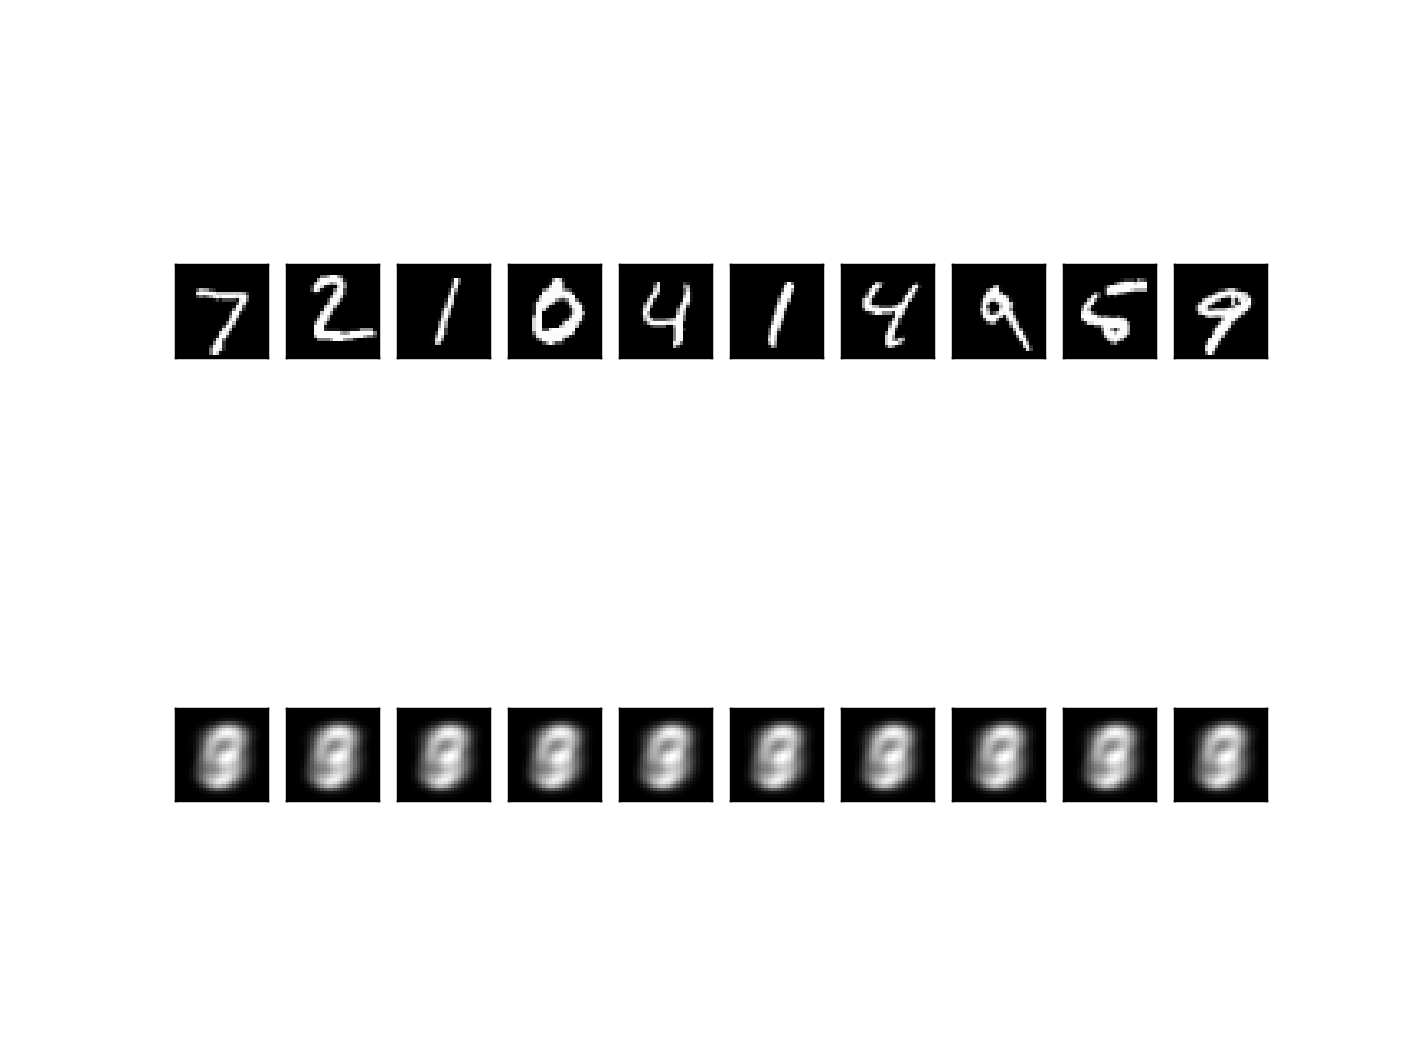

In [14]:
# Visualize the model

n = 10
# plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()